# Yulu Data Frame

### Installing and Importing libraries

In [1]:
%pip install seaborn

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chisquare,chi2_contingency,chi2
from scipy.stats import pearsonr,spearmanr
from scipy.stats import shapiro,levene
from scipy.stats import f_oneway,kruskal
from statsmodels.graphics.gofplots import qqplot

### *Read the yulu.csv file and create a data frame*

In [3]:
df = pd.read_csv('yulu.csv')
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### *checking the dataframe shape,null-values and other info*

In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 978.1+ KB


In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### unique values and count in categorial columns

In [8]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [9]:
# season (1: spring, 2: summer, 3: fall, 4: winter)

In [10]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [11]:
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [12]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [13]:
# 1 is for workingday, otherwise is 0.

In [14]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [15]:
# 1 for holiday and 0 is for not.

### Percentage of Registered and Casual User

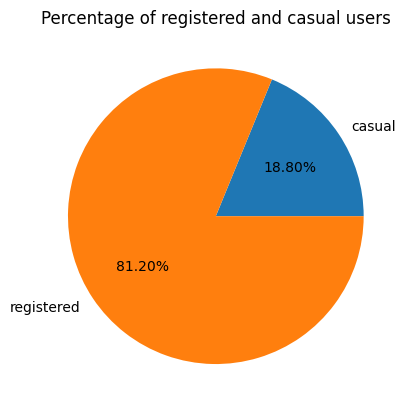

In [16]:
plt.pie(df[['casual','registered']].sum(),autopct='%.2f%%',labels=df[['casual','registered']].columns)
plt.title('Percentage of registered and casual users')
plt.show()

### Number of rented E-cycles in each season and each weather

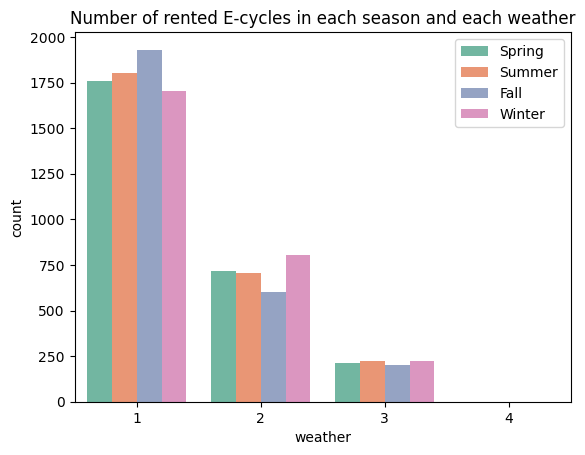

In [17]:
sns.countplot(data=df,x='weather',hue='season', palette='Set2')
plt.legend(['Spring','Summer','Fall','Winter'])
plt.title('Number of rented E-cycles in each season and each weather')
plt.show()

#### "In above graph we see most of the e-cycles are rented when weather is Clear, Few clouds or partly cloudy in every seasons. Maximum number of cycles rented in fall season when weather is clear or few clouds. Minmum number of cycles rented in Heavy Rain or Ice Pallets or Thunderstrome with mist or snow with fog in" 

## Outlier 

<AxesSubplot:ylabel='count'>

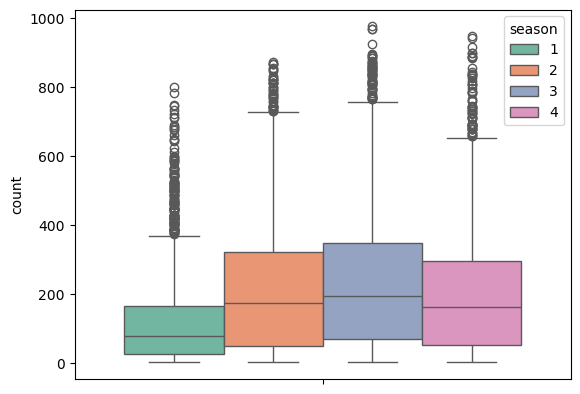

In [75]:
sns.boxplot(data=df, y=df['count'], hue='season', palette='Set2')

In [45]:
season1 = df.loc[df['season']==1]
season2 = df.loc[df['season']==2]
season3 = df.loc[df['season']==3]
season4 = df.loc[df['season']==4]

In [49]:
# season 1{spring} outliers
q1 = np.percentile(season1['count'],25)
q2 = np.percentile(season1['count'],50)
q3 = np.percentile(season1['count'],75)
iqr = q3-q1
upper_whisker = q3+(iqr*1.5)
lower_whisker = q1-(iqr*1.5)
outliers = (season1['count']>upper_whisker).count()
print([upper_whisker,lower_whisker])
print(outliers)

[374.0, -186.0]
2686


In [47]:
# season 2{summer} outliers
q1 = np.percentile(season2['count'],25)
q2 = np.percentile(season2['count'],50)
q3 = np.percentile(season2['count'],75)
iqr = q3-q1
upper_whisker = q3+(iqr*1.5)
lower_whisker = q1-(iqr*1.5)
outliers = (season2['count']>upper_whisker).count()
print([upper_whisker,lower_whisker])
print(outliers)

[729.0, -359.0]
2733


In [50]:
# season 3{fall} outliers
q1 = np.percentile(season3['count'],25)
q2 = np.percentile(season3['count'],50)
q3 = np.percentile(season3['count'],75)
iqr = q3-q1
upper_whisker = q3+(iqr*1.5)
lower_whisker = q1-(iqr*1.5)
outliers = (season3['count']>upper_whisker).count()
print([upper_whisker,lower_whisker])
print(outliers)

[765.5, -350.5]
2733


In [52]:
# season 4{winter} outliers
q1 = np.percentile(season4['count'],25)
q2 = np.percentile(season4['count'],50)
q3 = np.percentile(season4['count'],75)
iqr = q3-q1
upper_whisker = q3+(iqr*1.5)
lower_whisker = q1-(iqr*1.5)
outliers = (season4['count']>upper_whisker).count()
print([upper_whisker,lower_whisker])
print(outliers)

[658.5, -313.5]
2734


# Outliers in different weather

<AxesSubplot:ylabel='count'>

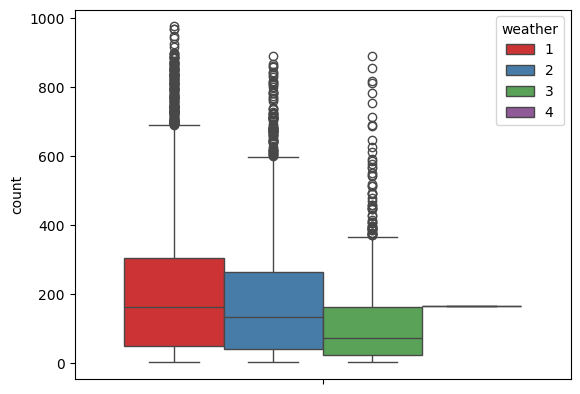

In [76]:
sns.boxplot(data=df, y='count',hue='weather', palette='Set1')

In [55]:
weather1 = df.loc[df['weather']==1]
weather2 = df.loc[df['weather']==2]
weather3 = df.loc[df['weather']==3]
weather4 = df.loc[df['weather']==4]

In [56]:
# weather 1 outliers
q1 = np.percentile(weather1['count'],25)
q2 = np.percentile(weather1['count'],50)
q3 = np.percentile(weather1['count'],75)
iqr = q3-q1
upper_whisker = q3+(iqr*1.5)
lower_whisker = q1-(iqr*1.5)
outliers = (weather1['count']>upper_whisker).count()
print([upper_whisker,lower_whisker])
print(outliers)

[690.5, -337.5]
7192


In [57]:
# weather 2 outliers
q1 = np.percentile(weather2['count'],25)
q2 = np.percentile(weather2['count'],50)
q3 = np.percentile(weather2['count'],75)
iqr = q3-q1
upper_whisker = q3+(iqr*1.5)
lower_whisker = q1-(iqr*1.5)
outliers = (weather2['count']>upper_whisker).count()
print([upper_whisker,lower_whisker])
print(outliers)

[598.5, -293.5]
2834


In [58]:
# weather 3 outliers
q1 = np.percentile(weather3['count'],25)
q2 = np.percentile(weather3['count'],50)
q3 = np.percentile(weather3['count'],75)
iqr = q3-q1
upper_whisker = q3+(iqr*1.5)
lower_whisker = q1-(iqr*1.5)
outliers = (weather3['count']>upper_whisker).count()
print([upper_whisker,lower_whisker])
print(outliers)

[368.0, -184.0]
859


In [59]:
# weather 4 outliers
q1 = np.percentile(weather4['count'],25)
q2 = np.percentile(weather4['count'],50)
q3 = np.percentile(weather4['count'],75)
iqr = q3-q1
upper_whisker = q3+(iqr*1.5)
lower_whisker = q1-(iqr*1.5)
outliers = (weather4['count']>upper_whisker).count()
print([upper_whisker,lower_whisker])
print(outliers) 

[164.0, 164.0]
1


In [60]:
# in weather 4 there is only one value so upper and lower are same.

In [61]:
workingday = df[df['workingday']==1]
offday = df[df['workingday']==0]
workingday['count'].sum(), offday['count'].sum()

(1430604, 654872)

In [64]:
workingday['count'].mean(),offday['count'].mean()

(193.01187263896384, 188.50662061024755)

## Working Day has effect on number of electric cycles rented

In [91]:
# here we use 2-ttest bcz {cat-num} relationship
# for that Ho[null hypothesis]= [workingday=offday]
# and  Ha[alternative hypothesis] = [workingday > offday]
# [workingday!=offday], [workingday <= offday], [workingday > offday]
# significence level = .05 or 5 %

In [72]:
ttest_ind(workingday['count'],offday['count'],alternative='greater',equal_var=False)

TtestResult(statistic=1.2362580418223226, pvalue=0.10820156140347549, df=7176.288413844308)

In [74]:
# As per my ttest result, on the basies of pvalue we can say that null hypothesis[Ho] is fail to reject.
# As per data : there is no effect  of working day on rented e-cycles.
# there is 10.82% values lies on right side of statistic.

# No. of cycles rented similar or different in different seasons

In [ ]:
# before to anova test we have check some assumptions:
# 1. each group is follow the gaussian distribution,
# 2. data of sample is independent for all group
# 3. equal varriance in defferent group

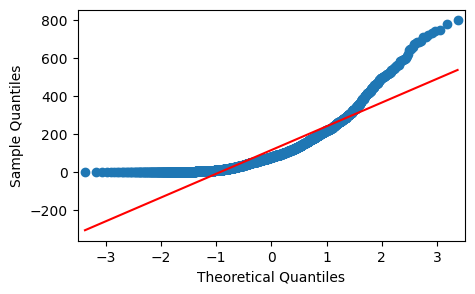

In [127]:
# with qqplot we can check group is following the gaussian distribution or not. 
fig, ax = plt.subplots(figsize=(5, 3))
qqplot(season1['count'],line='s',ax=ax)
plt.show()

# there is another test so we check all the groups with staticially, that groups is following gaussian or not?

In [141]:
# with Shapiro test
# Ho = data is gaussian distribution
# Ha = data is not gaussian distribution

In [131]:
season1_sample = season1.sample(200)
shapiro(season1_sample['count'])

ShapiroResult(statistic=0.7973095774650574, pvalue=2.1843107766874974e-15)

In [133]:
season2_sample = season2.sample(200)
shapiro(season2_sample['count'])

ShapiroResult(statistic=0.9159117937088013, pvalue=2.9502791321078803e-09)

In [134]:
season3_sample = season3.sample(200)
shapiro(season3_sample['count'])

ShapiroResult(statistic=0.9244676232337952, pvalue=1.2544050242979665e-08)

In [135]:
season4_sample = season4.sample(200)
shapiro(season4_sample['count'])

ShapiroResult(statistic=0.8903344869613647, pvalue=6.355672932389922e-11)

In [140]:
# all four group not follow the gaussian distribution so we test kruskal test.
# but before kruskal test we check the varriance are equal for different groups.

# check the varriance are equal for different groups.

In [142]:
# levene test
# Ho = varriance is equal
# Ha = varriance is not equal

<AxesSubplot:xlabel='count', ylabel='Count'>

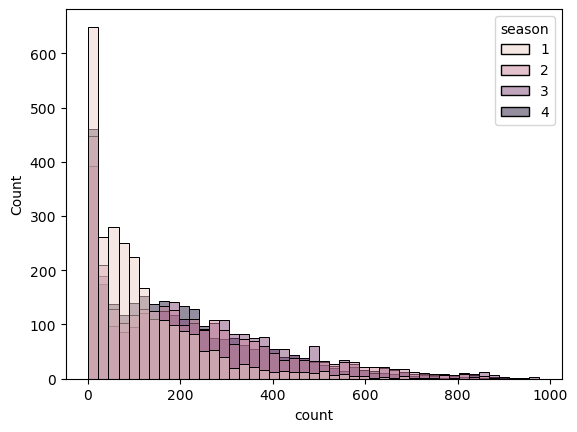

In [145]:
sns.histplot(data=df, x='count',hue='season')

In [149]:
levene(season1['count'],season2['count'],season3['count'],season4['count'])

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [150]:
# As per levene test, pvalue is very low so we reject our null hypothesis
# varriance is not equal

# kruskal test

In [137]:
# here we use kruskal test bcz in season there is 4 categories and this is categorial vs numerical 
# for that Ho[null hypothesis]= there is no impact for season on rented cycles
# and  Ha[alternative hypothesis] = season impact on rented cycles
# significence level = .05 or 5 %

In [138]:
kruskal(season1['count'],season2['count'],season3['count'],season4['count'])

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

In [ ]:
# As per kruskal test, pvalue is very low so we reject our null hypothesis
# in that means season impact on rented cycles

In [79]:
f_oneway(season1['count'],season2['count'],season3['count'],season4['count'])

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [139]:
# As per anova test also pvalue is very low but statistic are changed.

# No. of cycles rented similar or different in different weather

In [94]:
# here we use Anova test bcz in weather there is 4 categories and this is categorial vs numerical 
# for that Ho[null hypothesis]= there is no impact for weather on rented cycles
# and  Ha[alternative hypothesis] = weather impact on rented cycles
# significence level = .05 or 5 %

In [82]:
f_oneway(weather1['count'],weather2['count'],weather3['count'],weather4['count'])

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [83]:
# As per anova test, pvalue is very low so we reject our null hypothesis
# in that means weather impact on rented cycles

# Weather is dependent on season 

In [93]:
# To find out weather is dependent on season, we will do chi-square test
# Ho = weather and season are independent.
# Ha = weather is dependent on season.
# significence level = .05 or 5 %

In [87]:
weather_season = pd.crosstab(index=df['season'],columns=df['weather'])

In [89]:
weather_season

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [90]:
chi2_contingency(weather_season)

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [ ]:
# In chi test, we get very low pvalue as compare to alpha so we reject our null hypothesis.
# weather is dependent on season.

# temperature impact on No. of rented cycles 

In [ ]:
# we test pearson or spearman for to know temperature impact on No. of rented cycles or not
# Ho = No impact of temperature on No. of rented cycles
# Ha = temperature impact on No. of rented cycles

In [96]:
df['temp'].aggregate(['min','max'])

min     0.82
max    41.00
Name: temp, dtype: float64

In [98]:
df[['temp','count']].corr()

,temp,count
temp,1.000000,0.394454
count,0.394454,1.000000


In [102]:
spearmanr(df['temp'],df['count'])

SignificanceResult(statistic=0.40798939475098117, pvalue=0.0)

In [103]:
pearsonr(df['temp'],df['count'])

PearsonRResult(statistic=0.39445364496725027, pvalue=0.0)

In [104]:
# In spearman,pearson test, we get low pvalue as compare to alpha so we reject our null hypothesis.
# temperature impact on No. of rented cycles